# Superdense Coding Protocol

In this notebook I illustrate the implementation of the superdense protocol using Qiskit. The stes are the following

* Produce a Bell pair and give une qbit to sender and receiver each.
* Apply control X and control Z gates to sender qbit with control qbits a pair containing the massage to be codified.
* Send receiver the sender qbit.
* Undo entanglement on the pair of entangled qbits at receiver end.
* Read qbits. The outcome is the desired message to be communicated.

In [ ]:
! pip install qiskit

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector

Each of the following functions do the steps above

In [8]:
def CodeMessage(circ,mes):
  for idx in range(len(mes)):
    if mes[idx] == '1':
      circ.x(idx+2)
  circ.barrier()

def EntanglePair(circ):
  circ.h(0)
  circ.cx(0,1)
  circ.barrier()

def ApplyMessage(circ):
  circ.cx(2,0)
  circ.h(0)
  circ.cx(3,0)
  circ.h(0)
  circ.barrier()

def UndoEntanglement(circ):
  circ.cx(0,1)
  circ.h(0)
  circ.barrier()

def ReadMessage(circ):
  circ.measure(0,0)
  circ.measure(1,1)

def SuperdenseProtocol(mes):
  # Define registers used in the protocol
  q_entangled = QuantumRegister(2,name='q_entangled')
  q_message = QuantumRegister(2,name='q_message')
  c_read = ClassicalRegister(2,name='c_read') 
  # Create circuit
  qc_dense = QuantumCircuit(q_entangled,q_message,c_read)
  # Apply stages on the circuit
  CodeMessage(qc_dense,mes)
  EntanglePair(qc_dense)
  ApplyMessage(qc_dense)
  UndoEntanglement(qc_dense)
  ReadMessage(qc_dense)
  # Return circuit
  return qc_dense

In [16]:
qc_dense = SuperdenseProtocol('10')
qc_dense.draw()

░ ┌───┐      ░ ┌───┐┌───┐┌───┐┌───┐ ░      ┌───┐ ░ ┌─┐   
q_entangled_0: ──────░─┤ H ├──■───░─┤ X ├┤ H ├┤ X ├┤ H ├─░───■──┤ H ├─░─┤M├───
                     ░ └───┘┌─┴─┐ ░ └─┬─┘└───┘└─┬─┘└───┘ ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
q_entangled_1: ──────░──────┤ X ├─░───┼─────────┼────────░─┤ X ├──────░──╫─┤M├
               ┌───┐ ░      └───┘ ░   │         │        ░ └───┘      ░  ║ └╥┘
  q_message_0: ┤ X ├─░────────────░───■─────────┼────────░────────────░──╫──╫─
               └───┘ ░            ░             │        ░            ░  ║  ║ 
  q_message_1: ──────░────────────░─────────────■────────░────────────░──╫──╫─
                     ░            ░                      ░            ░  ║  ║ 
     c_read: 2/══════════════════════════════════════════════════════════╩══╩═
                                                                         0  1

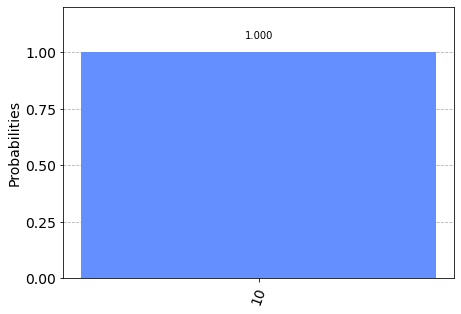

In [17]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc_dense,backend).result().get_counts()
plot_histogram(results)